<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U4_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio N° 2
El dataset registro_temperatura365d_smn.txt contiene las temperaturas máximas y mínimas
registradas diariamente entre el 03/10/2023 y el 01/10/2024 en todas las estaciones meteorológicas
de superficie pertenecientes al Servicio Meteorológico Nacional.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Explore la estructura del archivo. Notará que no se utiliza un delimitador particular para separar
las distintas columnas sino que los distintos campos están alineados en columnas con diferente
número de espacios que separan uno del otro. Por este motivo, y aprovechando que las primeras
columnas son de ancho fijo, se sugiere utilizar la función read_fwf() de Pandas, que permite
leer este tipo de archivos.

In [4]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad4/registro_temperatura365d_smn.txt'
data = pd.read_fwf(archivo,colspecs=[(0, 9),(9,15),(15,21),(21,101)], encoding='latin-1', skiprows=[2])
data.head(10)

,FECHA,TMAX,TMIN,NOMBRE
0,1102024,22.3,14.5,AEROPARQUE AERO
1,1102024,16.9,4.6,AZUL AERO
2,1102024,17.1,7.3,BAHIA BLANCA AERO
3,1102024,6.6,-1.1,BARILOCHE AERO
4,1102024,-10.0,-16.2,BASE BELGRANO II
5,1102024,-4.4,-11.0,BASE CARLINI (EX JUBANY)
6,1102024,-9.5,-14.5,BASE ESPERANZA
7,1102024,-13.2,-21.6,BASE MARAMBIO
8,1102024,-8.3,-12.8,BASE ORCADAS
9,1102024,-7.1,-15.4,BASE SAN MARTIN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43232 entries, 0 to 43231
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   43232 non-null  int64  
 1   TMAX    40375 non-null  float64
 2   TMIN    42651 non-null  float64
 3   NOMBRE  43232 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# Convertir la columna 'fecha' a tipo datetime
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d%m%Y', errors='coerce')
data.head(10)

,FECHA,TMAX,TMIN,NOMBRE
0,2024-10-01,22.3,14.5,AEROPARQUE AERO
1,2024-10-01,16.9,4.6,AZUL AERO
2,2024-10-01,17.1,7.3,BAHIA BLANCA AERO
3,2024-10-01,6.6,-1.1,BARILOCHE AERO
4,2024-10-01,-10.0,-16.2,BASE BELGRANO II
5,2024-10-01,-4.4,-11.0,BASE CARLINI (EX JUBANY)
6,2024-10-01,-9.5,-14.5,BASE ESPERANZA
7,2024-10-01,-13.2,-21.6,BASE MARAMBIO
8,2024-10-01,-8.3,-12.8,BASE ORCADAS
9,2024-10-01,-7.1,-15.4,BASE SAN MARTIN


In [7]:
data["NOMBRE"].value_counts()

,count
NOMBRE,
AEROPARQUE AERO,365
PRESIDENCIA ROQUE SAENZ PEÑA AERO,365
SALTA AERO,365
ROSARIO AERO,365
RIVADAVIA,365
...,...
JACHAL,346
OBERA,341
VICTORICA,334


2. Construya un gráfico que le permita comparar las distribuciones de temperaturas mínimas y
máximas diarias entre los últimos 12 meses (octubre 2023 a septiembre 2024) registradas en la
estación del Aeropuerto Rosario (”ROSARIO AERO”).

In [8]:
data_rosario = data[(data['NOMBRE']=='ROSARIO AERO') & (data['FECHA']>='2023-10-01') & (data['FECHA']<='2024-09-30')]
data_rosario

,FECHA,TMAX,TMIN,NOMBRE
204,2024-09-30,36.4,17.7,ROSARIO AERO
322,2024-09-29,32.3,14.3,ROSARIO AERO
440,2024-09-28,27.6,10.0,ROSARIO AERO
558,2024-09-27,24.2,5.5,ROSARIO AERO
676,2024-09-26,22.2,8.2,ROSARIO AERO
...,...,...,...,...
42726,2023-10-07,27.1,9.6,ROSARIO AERO
42845,2023-10-06,27.6,8.4,ROSARIO AERO
42964,2023-10-05,25.5,2.7,ROSARIO AERO
43082,2023-10-04,21.9,10.6,ROSARIO AERO


In [9]:
data_rosario[["TMAX","TMIN"]].describe()

,TMAX,TMIN
count,357.000000,357.000000
mean,24.188515,12.431653
std,6.422346,7.030102
min,8.400000,-6.100000
25%,19.300000,7.400000
50%,25.000000,13.700000
75%,29.100000,18.100000
max,38.400000,26.100000


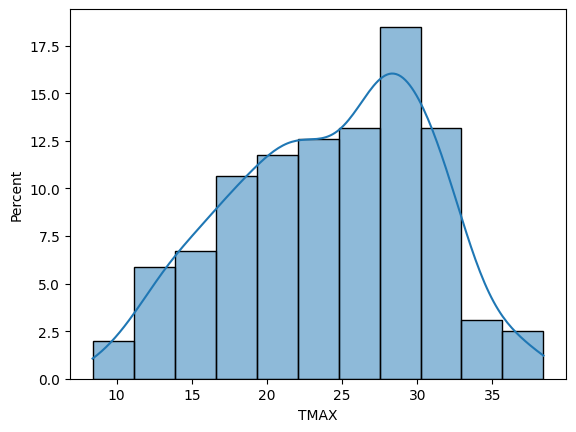

In [10]:
sns.histplot(x='TMAX', data=data_rosario,stat='percent', kde=True);

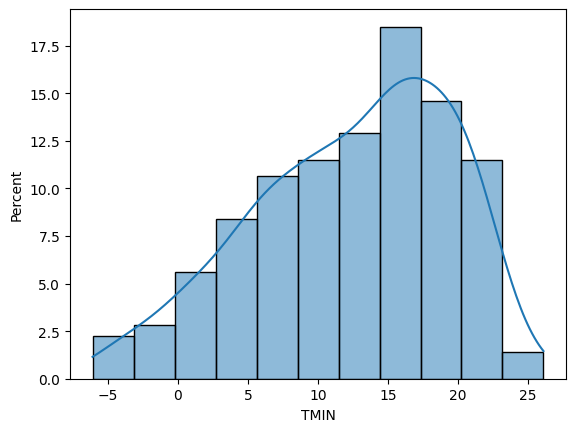

In [11]:
sns.histplot(x='TMIN', data=data_rosario,stat='percent', kde=True);

Para combinar ambos graficos en uno solo tendria que usar algo como esto: sns.kdeplot(x = 'calorias_quemadas', hue = 'actividad', multiple = 'layer', fill = True, data = df);
Pero tendria que tener una columna temperatura y una columna tipo que tenga los valores tmax o tmin.
O sea, pasar de un formato ancho a uno largo.


Para pasar nuestra tabla de formato ancho a formato largo podemos utilizar la operación pd.melt() de pandas que nos permite agrupar varias columnas en una sola, produciendo un DataFrame que es más largo que el de partida.

In [25]:
# Generamos la tabla en formato largo usando el método melt()
data_rosario_largo = pd.melt(data_rosario, id_vars = ['FECHA','NOMBRE'], value_vars = ['TMAX', 'TMIN'], var_name = 'tipo', value_name = 'temperatura').set_index('FECHA')
data_rosario_largo.reset_index(inplace=True)

In [26]:
# agrego una columna que sea el mes
data_rosario_largo['mes'] = data_rosario_largo['FECHA'].dt.month

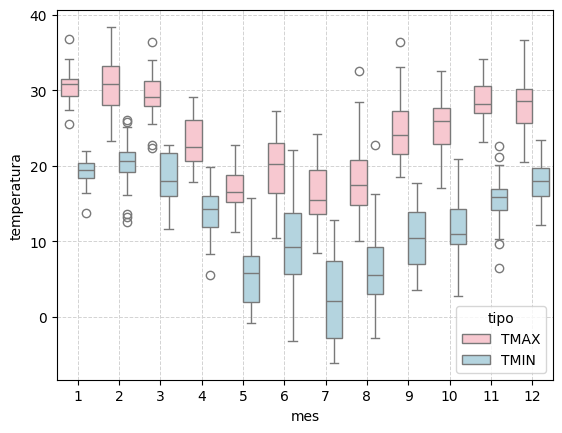

In [27]:
# Definir una paleta personalizada: colores asignados a cada valor único de 'tipo'
colores = {'TMAX': 'pink', 'TMIN': 'lightblue'}
ax1 = sns.boxplot(x = 'mes', y = 'temperatura', hue = 'tipo', data = data_rosario_largo, palette=colores)
# Agregar separadores más claros en el eje x
ax1.grid(True, which='both', axis='both', linestyle='--', color='lightgray', linewidth=0.7);


3. En base al gráfico realizado, responda las siguientes preguntas:

- ¿Cuál fue el mes del último año con la mayor temperatura máxima mediana?

**Enero**


- ¿Cuál fue el mes del último año con la menor temperatura mínima mediana?

**Julio**

- Considerando la variabilidad del 50% central de las temperaturas registradas en el mes, ¿cuál fue el mes del último año con una menor dispersión tanto en sus temperaturas mínimas como en sus temperaturas máximas?

**Enero**

• ¿Cuál fue el mes del último año que presentó una mayor amplitud en sus temperaturas mínimas registradas?

**Julio**

• Considerando los meses del invierno 2024, ¿existió algún mes en el cual se haya registrado una temperatura máxima atípica en relación al resto de los registros de ese mes?

**Agosto**




4. Realice nuevamente el ítem 2 con los datos correspondientes a la estación meteorológica
localizada en la Base Marambio de la Antártida Argentina. Compare los dos gráficos y comente
las diferencias que encuentra en las distribuciones de las temperaturas registradas en ambas
estaciones.

In [16]:
data_marambio = data[(data['NOMBRE']=='BASE MARAMBIO') & (data['FECHA']>='2023-10-01') & (data['FECHA']<='2024-09-30')]
data_marambio

,FECHA,TMAX,TMIN,NOMBRE
125,2024-09-30,-11.8,-16.4,BASE MARAMBIO
243,2024-09-29,-15.5,-22.0,BASE MARAMBIO
361,2024-09-28,-17.2,-20.2,BASE MARAMBIO
479,2024-09-27,-14.4,-19.3,BASE MARAMBIO
597,2024-09-26,-13.7,-17.6,BASE MARAMBIO
...,...,...,...,...
42646,2023-10-07,-15.3,-19.8,BASE MARAMBIO
42765,2023-10-06,-13.7,-16.7,BASE MARAMBIO
42884,2023-10-05,-10.6,-14.2,BASE MARAMBIO
43002,2023-10-04,0.1,-12.4,BASE MARAMBIO


In [17]:
# Generamos la tabla en formato largo usando el método melt()
data_marambio_largo = pd.melt(data_marambio, id_vars = ['FECHA','NOMBRE'], value_vars = ['TMAX', 'TMIN'], var_name = 'tipo', value_name = 'temperatura').set_index('FECHA')
data_marambio_largo.reset_index(inplace=True)

In [18]:
# agrego una columna que sea el mes
data_marambio_largo['mes'] = data_marambio_largo['FECHA'].dt.month

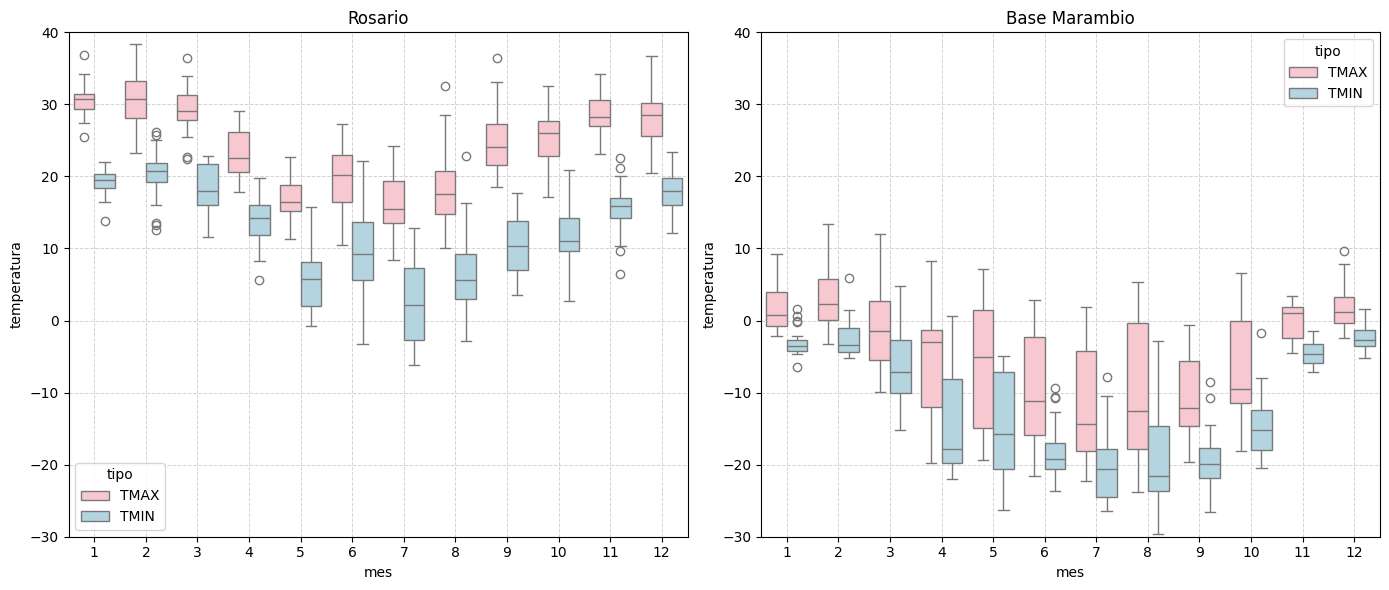

In [29]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Definir una paleta personalizada: colores asignados a cada valor único de 'tipo'
colores = {'TMAX': 'pink', 'TMIN': 'lightblue'}

sns.boxplot(x = 'mes', y = 'temperatura', hue = 'tipo', data = data_rosario_largo, palette=colores, ax=ax1)
# Agregar separadores más claros en el eje x
ax1.grid(True, which='both', axis='both', linestyle='--', color='lightgray', linewidth=0.7)
ax1.set_title('Rosario')

sns.boxplot(x = 'mes', y = 'temperatura', hue = 'tipo', data = data_marambio_largo, palette=colores, ax=ax2)
# Agregar separadores más claros en el eje x
ax2.grid(True, which='both', axis='both', linestyle='--', color='lightgray', linewidth=0.7)
ax2.set_title('Base Marambio')

# Establecer el mismo rango para el eje Y en ambos gráficos
ax1.set_ylim(-30, 40)
ax2.set_ylim(-30, 40)

# Mostrar los gráficos
plt.tight_layout();  # Ajusta el espacio entre los subgráficos

La temperatuda maxima y minima en la base marambio tiene mas dispersion que en rosario, sobre todo en los meses mas frios.
Los registros de temperatura maxima y minima de rosario estan dentro del rango -5 a 40 grados, mientras que en la base marambio estan dentro de del rango: -30 a 5 grados.


¿Cuál fue el mes del último año con la mayor temperatura máxima mediana?
Rosario: Enero
Marambio: Febrero

¿Cuál fue el mes del último año con la menor temperatura mínima mediana?
Rosario: Julio
Marambio: Agosto

Considerando la variabilidad del 50% central de las temperaturas registradas en el mes, ¿cuál fue el mes del último año con una menor dispersión tanto en sus temperaturas mínimas como en sus temperaturas máximas?
Rosario: Enero
Marambio: Enero

• ¿Cuál fue el mes del último año que presentó una mayor amplitud en sus temperaturas mínimas registradas?
Rosario: Julio
Marambio: Mayo

• Considerando los meses del invierno 2024, ¿existió algún mes en el cual se haya registrado una temperatura máxima atípica en relación al resto de los registros de ese mes?
Rosario: Agosto
Marambio: No